In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt

In [2]:
start = '2012-01-01'
end = dt.datetime(2024,4,6)
stock = 'RPOWER.NS'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
data.reset_index(inplace=True)

In [4]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-02,71.400002,71.400002,69.150002,69.949997,68.526802,2287476
1,2012-01-03,70.800003,72.800003,70.650002,72.449997,70.975937,3328845
2,2012-01-04,72.900002,73.300003,70.699997,71.099998,69.653404,3309930
3,2012-01-05,71.500000,72.050003,70.500000,70.800003,69.359512,2058019
4,2012-01-06,70.699997,75.199997,69.699997,73.449997,71.955589,6876475
...,...,...,...,...,...,...,...
3018,2024-04-01,28.850000,29.150000,28.549999,28.900000,28.900000,18489103
3019,2024-04-02,29.299999,30.299999,28.400000,30.299999,30.299999,24909272
3020,2024-04-03,30.549999,31.799999,30.400000,31.799999,31.799999,28544626
3021,2024-04-04,33.349998,33.349998,32.650002,33.349998,33.349998,22445936


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3023 entries, 0 to 3022
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3023 non-null   datetime64[ns]
 1   Open       3023 non-null   float64       
 2   High       3023 non-null   float64       
 3   Low        3023 non-null   float64       
 4   Close      3023 non-null   float64       
 5   Adj Close  3023 non-null   float64       
 6   Volume     3023 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 165.4 KB


In [6]:
ma_100_days = data.Close.rolling(100).mean()

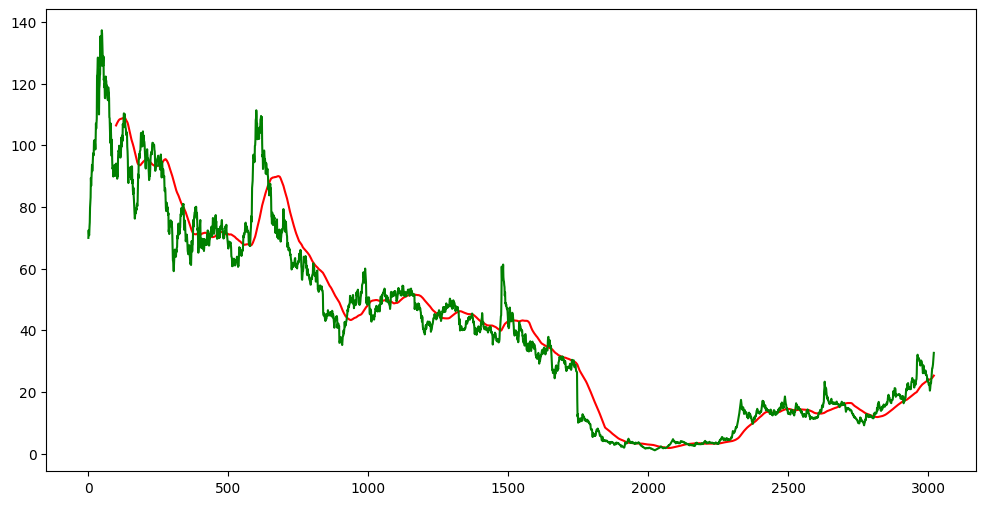

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [ ]:
ma_200_days = data.Close.rolling(200).mean()

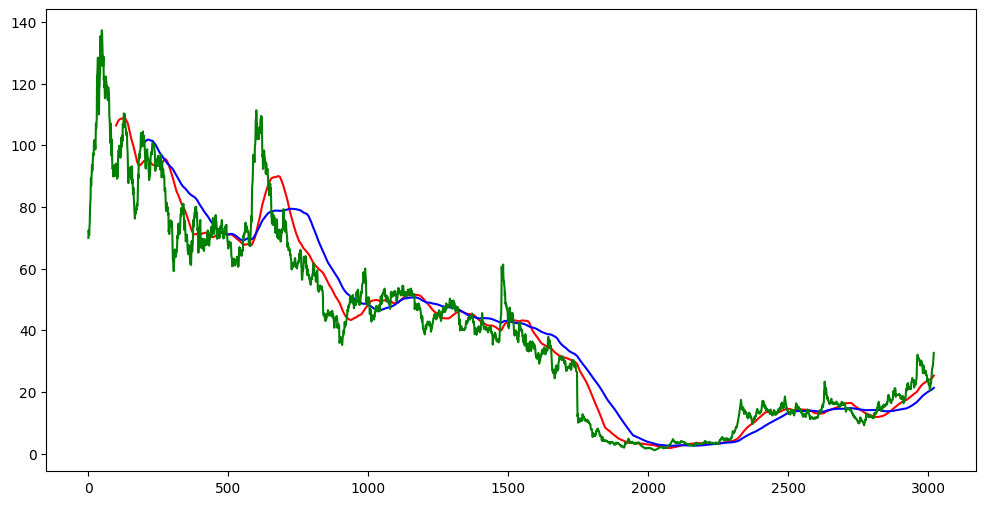

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [ ]:
data.dropna(inplace=True)

In [ ]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.60)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.60): len(data)])

In [ ]:
data_train.shape[0]

1813

In [ ]:
data_test.shape[0]

1209

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
data_train_scale = scaler.fit_transform(data_train)

In [ ]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])


In [ ]:
x, y = np.array(x), np.array(y)


**LSTM MODEL**

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
54/54 [==============================] - 21s 276ms/step - loss: 0.0395
Epoch 2/50
54/54 [==============================] - 16s 306ms/step - loss: 0.0082
Epoch 3/50
54/54 [==============================] - 15s 278ms/step - loss: 0.0074
Epoch 4/50
54/54 [==============================] - 15s 282ms/step - loss: 0.0059
Epoch 5/50
54/54 [==============================] - 16s 293ms/step - loss: 0.0055
Epoch 6/50
54/54 [==============================] - 15s 278ms/step - loss: 0.0053
Epoch 7/50
54/54 [==============================] - 15s 278ms/step - loss: 0.0055
Epoch 8/50
54/54 [==============================] - 15s 277ms/step - loss: 0.0053
Epoch 9/50
54/54 [==============================] - 15s 279ms/step - loss: 0.0055
Epoch 10/50
54/54 [==============================] - 16s 295ms/step - loss: 0.0045
Epoch 11/50
54/54 [==============================] - 15s 278ms/step - loss: 0.0043
Epoch 12/50
54/54 [==============================] - 15s 276ms/step - loss: 0.0040
Epoch 13/50
5

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
pas_100_days = data_train.tail(100)

In [ ]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [ ]:
data_test_scale  =  scaler.fit_transform(data_test)

In [ ]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [ ]:
y_predict = model.predict(x)

38/38 [==============================] - 4s 86ms/step


In [ ]:
scale =1/scaler.scale_

In [ ]:
y_predict = y_predict*scale

In [ ]:
y = y*scale

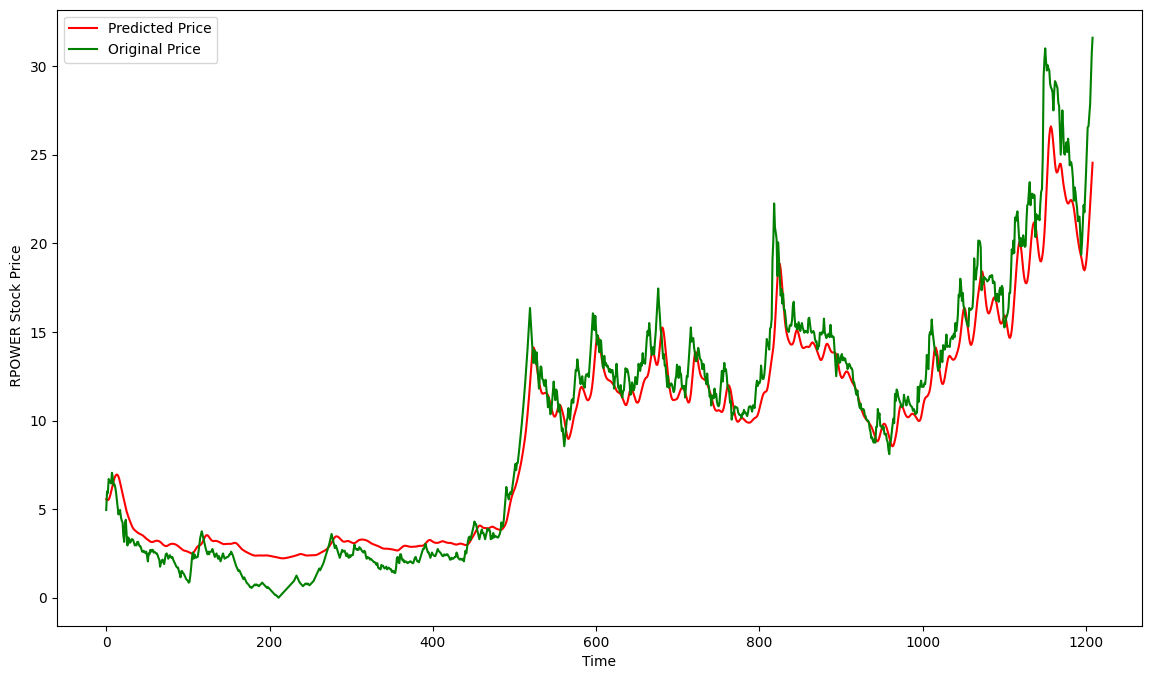

In [ ]:
plt.figure(figsize=(14,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel(' RPOWER Stock Price')
plt.legend()
plt.show()

In [ ]:
model.save('Stock Predictions Model.keras')

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model = load_model('/content/Stock Predictions Model.keras')

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mae = mean_absolute_error(y, y_predict)
print('Mean Absolute Error (MAE):', mae)

Mean Absolute Error (MAE): 1.1948544720563021


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
rmse = np.sqrt(mean_squared_error(y, y_predict))
print('Root Mean Squared Error (RMSE):', rmse)


Root Mean Squared Error (RMSE): 1.6419773635707076


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2 = r2_score(y, y_predict)
print('R-squared (R^2):', r2)

R-squared (R^2): 0.9468692644017842


In [ ]:
y_range = np.max(y) - np.min(y)

In [ ]:
rmse_normalized = rmse / y_range
mae_normalized = mae / y_range

In [ ]:
rmse_accuracy_percentage = (1 - rmse_normalized) * 100
mae_accuracy_percentage = (1 - mae_normalized) * 100


In [ ]:
print('RMSE Accuracy:', rmse_accuracy_percentage, '%')
print('MAE Accuracy:', mae_accuracy_percentage, '%')

RMSE Accuracy: 94.80386936137235 %
MAE Accuracy: 96.21881515013611 %
